<a href="https://colab.research.google.com/github/prakharrustagi42/Prakhar_INFO5731_Fall2025/blob/main/Rustagi_Prakhar_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load dataset
# Ensure 'dataset.csv' is uploaded to your Colab environment or provide the correct path.
df = pd.read_csv('/content/drive/MyDrive/dataset.csv', encoding='latin-1', usecols=[2, 3], names=["sentiment", "Tweet content"], header=None)

# Map labels
df['sentiment'] = df['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})  # 0 = Negative, 1 = Neutral, 2 = Positive

# 2. Exploratory Data Analysis (EDA)

# drop NaN rows
df = df.dropna()

# Preprocess text
def preprocess(text):
    # text = re.sub(r"[0-9\s]", '')
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", '', text.lower())
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    return ' '.join([lemmatizer.lemmatize(w) for w in tokens if w not in stop_words])

df['clean_text'] = df['Tweet content'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


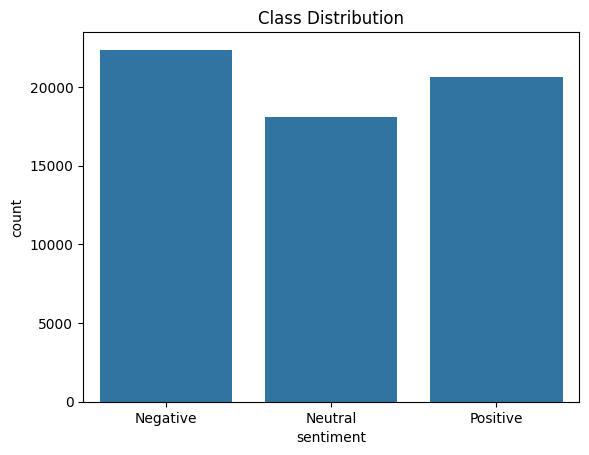

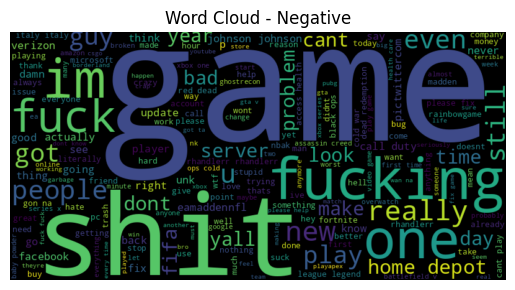

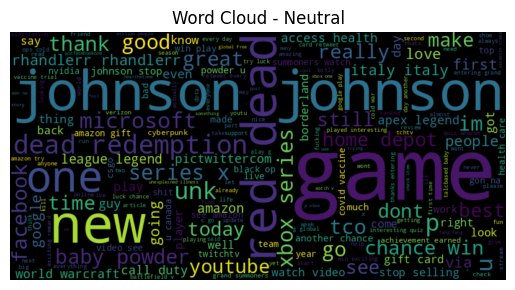

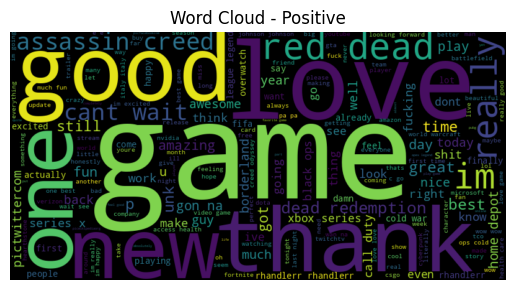

In [3]:
# Visualize class distribution
sns.countplot(x='sentiment', data=df)
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.title("Class Distribution")
plt.show()

# Word clouds for each sentiment
for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    words = ' '.join(df[df['sentiment'] == i]['clean_text'])
    if words!=0:
      wordcloud = WordCloud(width=800, height=400).generate(words)
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis("off")
      plt.title(f"Word Cloud - {label}")
      plt.show()


=== Naive Bayes ===
              precision    recall  f1-score   support

    Negative       0.70      0.82      0.75      4427
     Neutral       0.76      0.54      0.63      3678
    Positive       0.70      0.75      0.73      4120

    accuracy                           0.71     12225
   macro avg       0.72      0.70      0.70     12225
weighted avg       0.72      0.71      0.71     12225



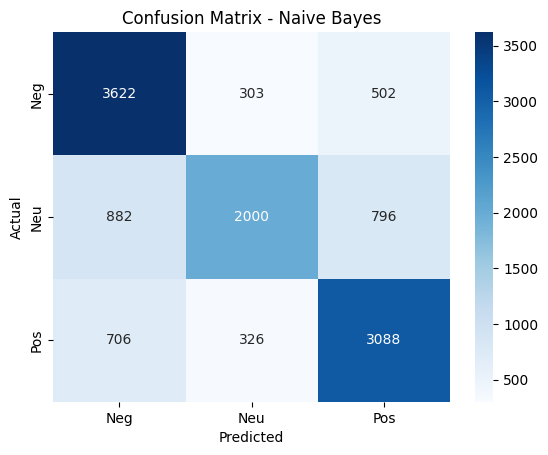


=== SVM ===
              precision    recall  f1-score   support

    Negative       0.76      0.83      0.80      4427
     Neutral       0.77      0.68      0.72      3678
    Positive       0.77      0.77      0.77      4120

    accuracy                           0.77     12225
   macro avg       0.77      0.76      0.76     12225
weighted avg       0.77      0.77      0.77     12225



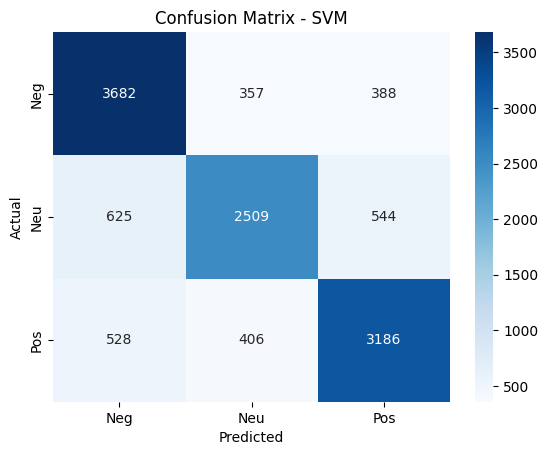

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:11:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

    Negative       0.65      0.85      0.74      4427
     Neutral       0.75      0.55      0.63      3678
    Positive       0.75      0.68      0.71      4120

    accuracy                           0.70     12225
   macro avg       0.72      0.69      0.69     12225
weighted avg       0.71      0.70      0.70     12225



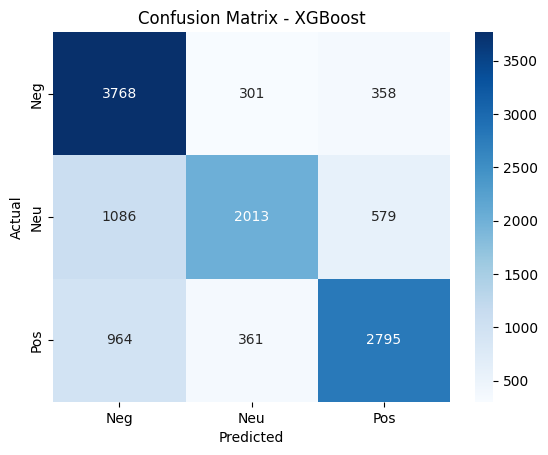

In [4]:
# 3. Sentiment Classification

# TF-IDF Vectorization
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 4. Evaluation & Reporting

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds, target_names=['Negative', 'Neutral', 'Positive']))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**Results**

SVM is the most accurate model overall. With an accuracy of 0.77, it correctly classifies a larger proportion of the sentiment instances compared to Naive Bayes (0.71) and XGBoost (0.70).

Naive Bayes and XGBoost have similar overall accuracy, but they achieve this accuracy through different patterns of precision and recall across the classes.

XGBoost excels in recall for the Negative class (0.85), meaning it correctly identifies a large proportion of the actual negative instances. However, its precision is the lowest (0.65), indicating that a significant portion of what it predicts as negative might actually be neutral or positive.

SVM has the highest precision for the Neutral class (0.77), meaning when it predicts an instance as neutral, it's more likely to be correct. However, its recall is moderate (0.68), indicating it misses a portion of the actual neutral instances.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [5]:

# Write your code here
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load train data
with open('/content/drive/MyDrive/stsa-train.txt', 'r', encoding='utf-8') as f:
    train_lines = f.readlines()
train_data = [(line[0], line[2:].strip()) for line in train_lines if line.strip()]
df_train = pd.DataFrame(train_data, columns=['Label', 'Text'])
df_train['Label'] = df_train['Label'].astype(int)

# Load test data
with open('/content/drive/MyDrive/stsa-test.txt', 'r', encoding='utf-8') as f:
    test_lines = f.readlines()
test_data = [(line[0], line[2:].strip()) for line in test_lines if line.strip()]
df_test = pd.DataFrame(test_data, columns=['Label', 'Text'])
df_test['Label'] = df_test['Label'].astype(int)

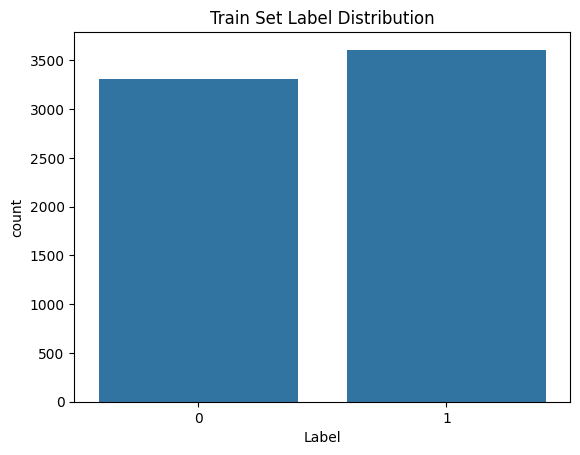

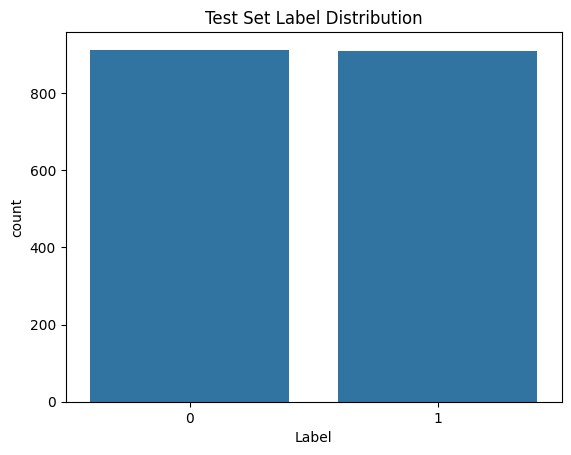

Train text length:
 count    6920.000000
mean       19.299855
std         9.318495
min         2.000000
25%        12.000000
50%        19.000000
75%        25.000000
max        52.000000
Name: text_length, dtype: float64
Test text length:
 count    1821.000000
mean       19.232839
std         8.922846
min         2.000000
25%        12.000000
50%        18.000000
75%        25.000000
max        56.000000
Name: text_length, dtype: float64


In [6]:
# Class distribution
sns.countplot(data=df_train, x='Label')
plt.title("Train Set Label Distribution")
plt.show()

sns.countplot(data=df_test, x='Label')
plt.title("Test Set Label Distribution")
plt.show()

# Average text length
df_train['text_length'] = df_train['Text'].apply(lambda x: len(x.split()))
df_test['text_length'] = df_test['Text'].apply(lambda x: len(x.split()))
print("Train text length:\n", df_train['text_length'].describe())
print("Test text length:\n", df_test['text_length'].describe())

In [7]:

# Train, Validation and Test split
X = df_train['Text']
y = df_train['Label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(df_test['Text'])

# Define models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Function to evaluate model
def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f"\nEvaluating {name}")

    # 10-fold cross-validation (F1 score)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    # print(f"Avg CV F1 Score: {cv_scores.mean():.4f}")

    # Train & predict on validation set
    model.fit(X_train, y_train)

    # predict on validation set
    val_preds = model.predict(X_val)

    # predict on test set
    test_preds = model.predict(X_test)

    # Metrics helper
    def get_metrics(y_true, y_pred):
        return {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred),
            'Recall': recall_score(y_true, y_pred),
            'F1': f1_score(y_true, y_pred)
        }

    val_metrics = get_metrics(y_val, val_preds)
    test_metrics = get_metrics(y_test, test_preds)

    # print("Validation:", val_metrics)
    # print("Test:", test_metrics)

    return name, val_metrics, test_metrics

# Run evaluations
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, df_test['Label']))


Evaluating SVM

Evaluating KNN

Evaluating Decision Tree

Evaluating Random Forest


In [8]:

# Evaluation Results
# Format results into DataFrames
val_df = pd.DataFrame({name: val for name, val, test in results})
test_df = pd.DataFrame({name: test for name, val, test in results})

# Show side-by-side comparison of metrics
print("\n=== Validation Metrics Across Models ===")
print(val_df)

print("\n=== Test Metrics Across Models ===")
print(test_df)


=== Validation Metrics Across Models ===
                SVM       KNN  Decision Tree  Random Forest
Accuracy   0.768786  0.528179       0.595376       0.700145
Precision  0.763089  0.549640       0.613764       0.708277
Recall     0.807479  0.529086       0.605263       0.722992
F1         0.784657  0.539167       0.609484       0.715559

=== Test Metrics Across Models ===
                SVM       KNN  Decision Tree  Random Forest
Accuracy   0.801208  0.520593       0.608457       0.717188
Precision  0.789418  0.519438       0.606291       0.697791
Recall     0.820682  0.529153       0.614961       0.764576
F1         0.804746  0.524251       0.610595       0.729659


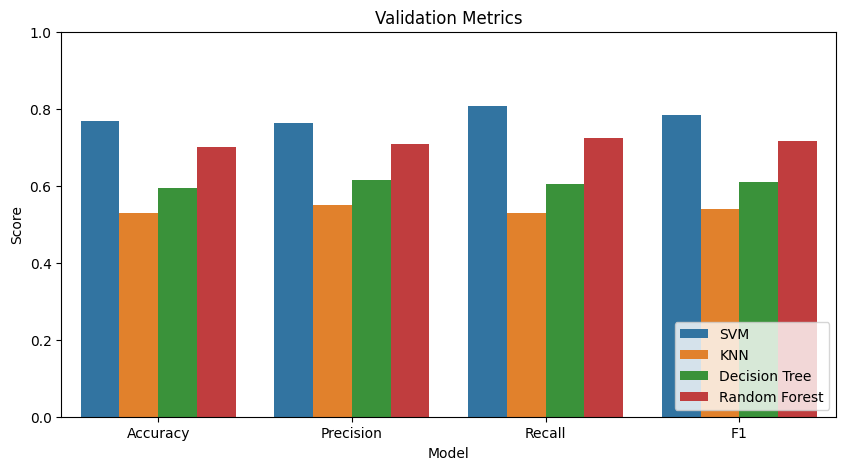

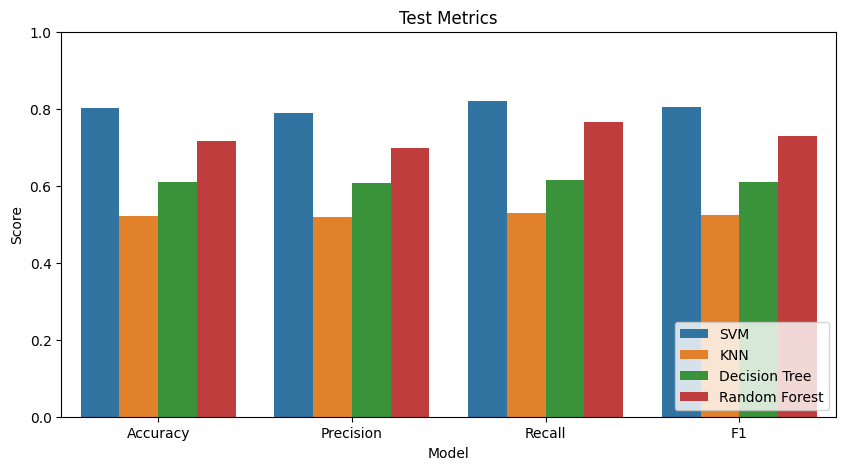

In [9]:
# Melt for seaborn
val_df['Model'] = val_df.index
test_df['Model'] = test_df.index

val_melted = val_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
test_melted = test_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=val_melted, x='Model', y='Score', hue='Metric')
plt.title("Validation Metrics")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=test_melted, x='Model', y='Score', hue='Metric')
plt.title("Test Metrics")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [10]:
# Write your code here
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 21.4 MB/s eta 0:00:00


In [11]:
# Write your code here
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Amazon_Unlocked_Mobile.csv')  # replace with actual filename
df = df.head(2000)

# removing rows with null values
print(df['Reviews'].isnull().sum())

0


In [12]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# dropping NaN rows
df = df.dropna()

# text preprocessing
def preprocess(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", '', text.lower())
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    return ' '.join([w for w in tokens if w not in stop_words])

df['clean_text'] = df['Reviews'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


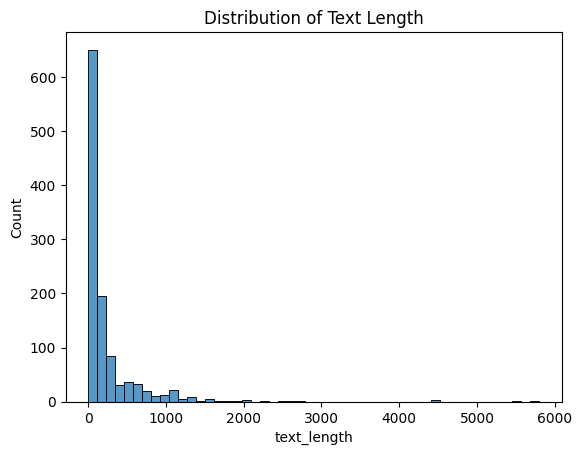

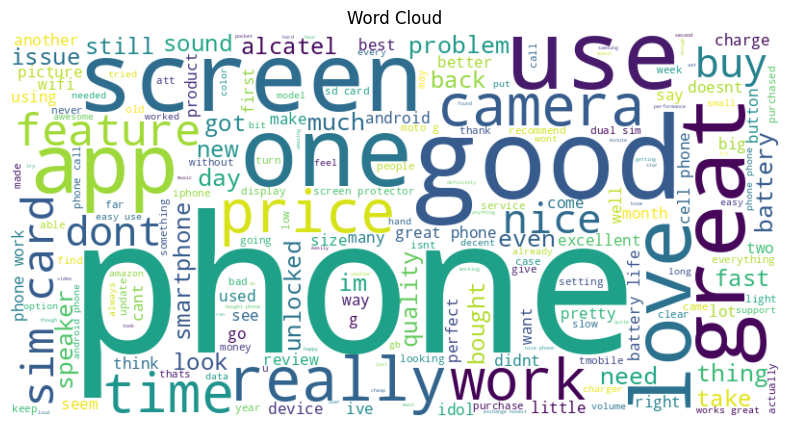

In [13]:
# Basic text length stats
df['text_length'] = df['clean_text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Length')
plt.show()

# WordCloud
text_combined = ' '.join(df['clean_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [14]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# Reduce TF-IDF vectors to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_tfidf.toarray())

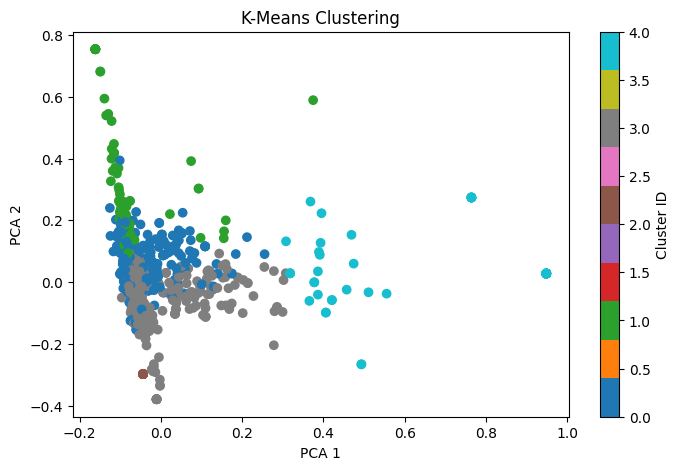

In [15]:
# KMean Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(X_tfidf)

# Cluster Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['kmeans_labels'], cmap='tab10')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()

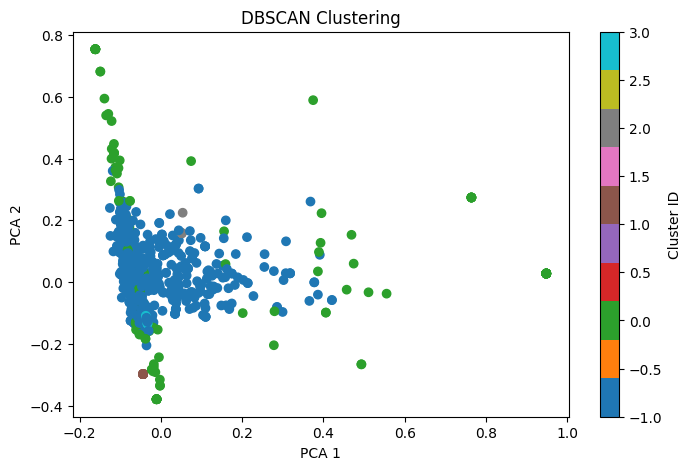

In [16]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
df['dbscan_labels'] = dbscan.fit_predict(X_tfidf)

# Cluster plot
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['dbscan_labels'], cmap='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()

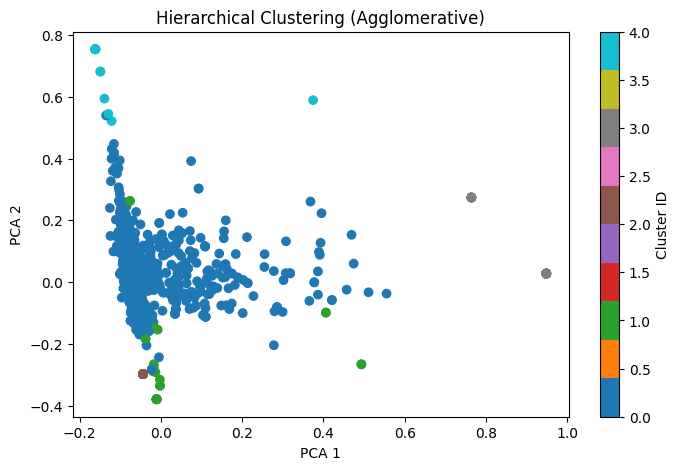

In [17]:
# Herarical Clustering
hier = AgglomerativeClustering(n_clusters=5)
df['hier_labels'] = hier.fit_predict(X_tfidf.toarray())

# Cluster plot
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['hier_labels'], cmap='tab10')
plt.title('Hierarchical Clustering (Agglomerative)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()

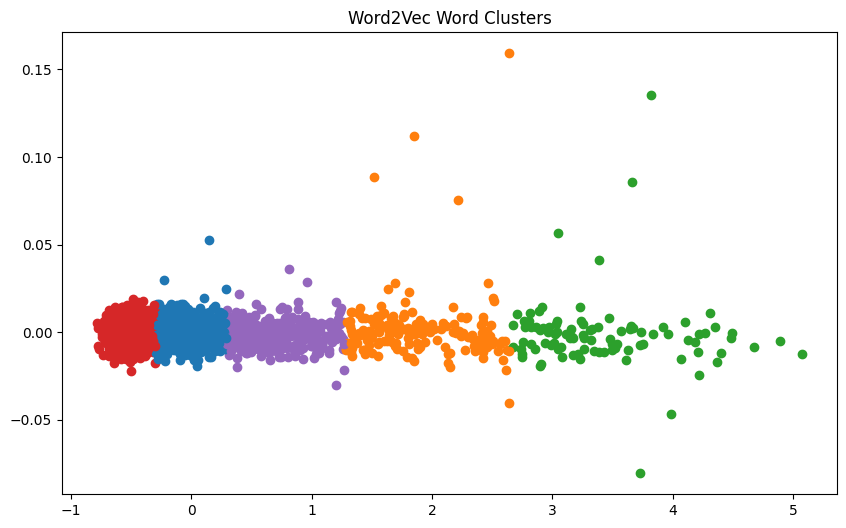

In [18]:
# Word2Vec Cluster
# Tokenize for Word2Vec
sentences = df['clean_text'].apply(lambda x: x.split()).tolist()
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
word_vectors = [w2v_model.wv[word] for word in w2v_model.wv.index_to_key]

# Cluster words
w2v_kmeans = KMeans(n_clusters=5, random_state=42)
w2v_labels = w2v_kmeans.fit_predict(word_vectors)

# Visualize Word2Vec Clusters
word_pca = PCA(n_components=2).fit_transform(word_vectors)
plt.figure(figsize=(10, 6))
for i, word in enumerate(w2v_model.wv.index_to_key):
    plt.scatter(word_pca[i, 0], word_pca[i, 1], c=f'C{w2v_labels[i]}')
    # plt.text(word_pca[i, 0]+0.01, word_pca[i, 1]+0.01, word, fontsize=4)
plt.title('Word2Vec Word Clusters')
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

. K-Means Clustering: The clusters are moderately distinct, though there is overlap between some groups (especially blue, gray, and cyan).

. DBSCAN: Large central cluster (blue), with some green and gray clusters likely representing outliers.

. Hierarchical Clustering: One dominant cluster (blue), with several scattered small clusters (green, red, etc.).

. Word2Vec-Based Clustering: Visually well-separated and linearly spread clusters from left to right.

We can clearly say that Word2Vec has done the best semantic clusters and seperation followed by KMeans. But Kmeans had many overlapping data. DBSCAN had less clusters compared to others but has a very good outlier handling. Heirarical clustering was not as effcitive as it had a single large cluster and less structure.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
"""
Overall this assignment was easy, because by the time i reached this assignment i have already read about
this and worked on this topic on my own. So it became easy.
The clustering part was hard to interpret, because if we take more data then the text is covering up the whole graph.
therefore for now i went with less number of samples and removed the text from being displayed.
"""